In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("zoo.data")
feature_column = [
"hair",
"feathers",
"eggs",
"milk",
"airborne",
"aquatic",
"predator",
"toothed",
"backbone",
"breathes",
"venomous",
"fins",
"legs",
"tail",
"domestic",
"catsize",
]
data.columns = ["name", *feature_column, "class"]
data

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,0.420000,0.200000,0.590000,0.400000,0.240000,0.360000,0.55,0.600000,0.820000,0.79000,0.08000,0.170000,2.830000,0.750000,0.130000,0.43000,2.850000
std,0.496045,0.402015,0.494311,0.492366,0.429235,0.482418,0.50,0.492366,0.386123,0.40936,0.27266,0.377525,2.040276,0.435194,0.337998,0.49757,2.105188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.00000,0.000000,2.000000,0.750000,0.000000,0.00000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,3.000000,1.000000,0.000000,0.00000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,4.000000,1.000000,0.000000,1.00000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.00000,1.00000,1.000000,8.000000,1.000000,1.000000,1.00000,7.000000


In [4]:
feature_data = data[feature_column]
feature_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
cov_matrix = feature_data.cov()
cov_matrix

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
hair,0.246061,-0.084848,-0.199798,0.214141,-4.121212e-02,-0.112323,-0.041414,0.119192,0.035960,0.089091,-0.013737,-0.051919,0.395354,1.515152e-02,0.035758,0.110505
feathers,-0.084848,0.161616,0.082828,-0.080808,1.131313e-01,-0.012121,-0.020202,-0.121212,0.036364,0.042424,-0.016162,-0.034343,-0.167677,5.050505e-02,0.004040,-0.026263
eggs,-0.199798,0.082828,0.244343,-0.228283,7.919192e-02,0.088485,0.005556,-0.155556,-0.064444,-0.076869,0.012929,0.030000,-0.221919,-5.303030e-02,-0.026970,-0.124949
milk,0.214141,-0.080808,-0.228283,0.242424,-7.676768e-02,-0.084848,-0.010101,0.151515,0.072727,0.084848,-0.032323,-0.028283,0.210101,5.050505e-02,0.028283,0.139394
airborne,-0.041212,0.113131,0.079192,-0.076768,1.842424e-01,-0.036768,-0.062626,-0.125253,-0.016970,0.050909,0.000808,-0.041212,0.041212,-2.803593e-17,0.008889,-0.073939
aquatic,-0.112323,-0.012121,0.088485,-0.084848,-3.676768e-02,0.232727,0.092929,0.014141,0.004848,-0.125657,0.011313,0.109899,-0.352323,-1.010101e-02,-0.037172,-0.025051
predator,-0.041414,-0.020202,0.005556,-0.010101,-6.262626e-02,0.092929,0.250000,0.030303,0.009091,-0.055051,0.016162,0.036869,-0.107576,7.575758e-03,-0.052020,0.033838
toothed,0.119192,-0.121212,-0.155556,0.151515,-1.252525e-01,0.014141,0.030303,0.242424,0.109091,-0.014141,-0.008081,0.068687,-0.200000,7.070707e-02,0.012121,0.082828
backbone,0.035960,0.036364,-0.064444,0.072727,-1.696970e-02,0.004848,0.009091,0.109091,0.149091,0.032525,-0.025859,0.030909,-0.344040,1.262626e-01,0.013535,0.068081
breathes,0.089091,0.042424,-0.076869,0.084848,5.090909e-02,-0.125657,-0.055051,-0.014141,0.032525,0.167576,-0.013333,-0.095253,0.307374,1.767677e-02,0.017475,0.040707


<Axes: >

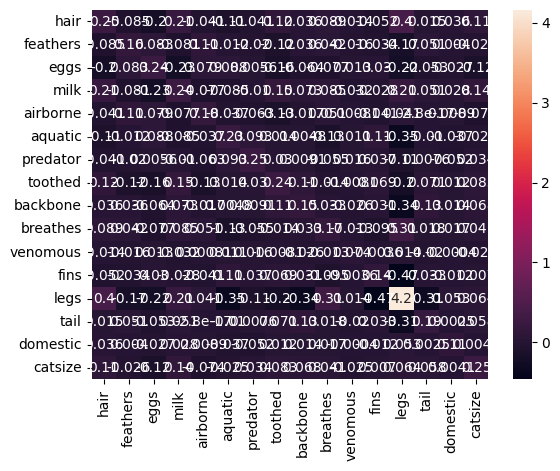

In [6]:
sns.heatmap(cov_matrix, annot=True)

In [7]:
corr_matrix = feature_data.corr()
corr_matrix

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
hair,1.000000,-0.425481,-0.814835,0.876782,-1.935571e-01,-0.469380,-0.166977,0.488020,0.187745,0.438740,-0.101569,-0.277243,0.390639,7.018624e-02,0.213272,0.447721
feathers,-0.425481,1.000000,0.416808,-0.408248,6.556101e-01,-0.062500,-0.100504,-0.612372,0.234261,0.257790,-0.147442,-0.226285,-0.204429,2.886751e-01,0.029735,-0.131293
eggs,-0.814835,0.416808,1.000000,-0.937961,3.732379e-01,0.371061,0.022478,-0.639142,-0.337644,-0.379877,0.095930,0.160759,-0.220042,-2.465135e-01,-0.161422,-0.508019
milk,0.876782,-0.408248,-0.937961,1.000000,-3.632416e-01,-0.357217,-0.041030,0.625000,0.382546,0.420969,-0.240772,-0.152156,0.209147,2.357023e-01,0.169950,0.568986
airborne,-0.193557,0.655610,0.373238,-0.363242,1.000000e+00,-0.177561,-0.291804,-0.592657,-0.102389,0.289731,0.006905,-0.254322,0.047059,2.551444e-17,0.061269,-0.346200
aquatic,-0.469380,-0.062500,0.371061,-0.357217,-1.775611e-01,1.000000,0.385264,0.059536,0.026029,-0.636291,0.086008,0.603426,-0.357955,-4.811252e-02,-0.227969,-0.104361
predator,-0.166977,-0.100504,0.022478,-0.041030,-2.918043e-01,0.385264,1.000000,0.123091,0.047088,-0.268959,0.118548,0.195318,-0.105452,3.481553e-02,-0.307814,0.136015
toothed,0.488020,-0.612372,-0.639142,0.625000,-5.926573e-01,0.059536,0.123091,1.000000,0.573819,-0.070162,-0.060193,0.369522,-0.199092,3.299832e-01,0.072836,0.338093
backbone,0.187745,0.234261,-0.337644,0.382546,-1.023891e-01,0.026029,0.047088,0.573819,1.000000,0.205774,-0.245617,0.212039,-0.436712,7.513914e-01,0.103712,0.354360
breathes,0.438740,0.257790,-0.379877,0.420969,2.897310e-01,-0.636291,-0.268959,-0.070162,0.205774,1.000000,-0.119457,-0.616347,0.368021,9.922343e-02,0.126297,0.199853


<Axes: >

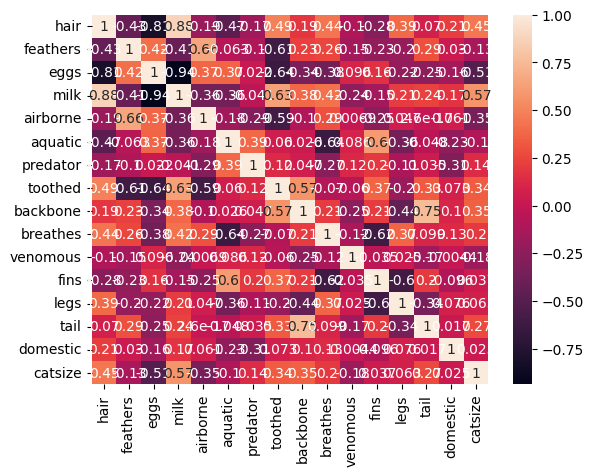

In [8]:
sns.heatmap(corr_matrix, annot=True)

In [9]:
class PCA:
  def __init__(self, data: pd.DataFrame) -> None:
    self.__data = data
    self.__eigval: np.ndarray = None
    self.__eigvec: np.ndarray = None
    self.__x_adj: pd.DataFrame = None
    self.__cov_adj: pd.DataFrame = None
    self.__sort_idx: np.ndarray = None  
    self.__cal_pca()

  def __cal_pca(self):
    self.__x_adj = (self.__data - self.__data.mean()) / self.__data.std()
    self.__cov_adj = self.__x_adj.cov()
    self.__eigval, self.__eigvec = np.linalg.eig(self.__cov_adj)
    self.__sort_idx = np.argsort(self.__eigval)[::-1]

  def eigvec(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigvec
    
    return self.__eigvec[self.__sort_idx[:n]]
  
  def eigval(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigval

    return self.__eigval[self.__sort_idx[:n]]
  
  def project(self, n: int) -> pd.DataFrame:
    max_eigvec = self.eigvec(n)
    new_x = max_eigvec.dot(self.__x_adj.T).T
    new_x = pd.DataFrame(new_x)
    new_x.columns = [f"PC{i+1}" for i in range(n)]
    return new_x
  
  def per_var_of(self, n: int) -> float:
    return self.eigval(n).sum() / self.eigval().sum()
  
  def eig_var(self) -> list[float]:
    sum_val = self.__eigval.sum()
    return [ e / sum_val for e in self.__eigval]



In [10]:
def add_class(data: pd.DataFrame, classes: pd.Series) -> pd.DataFrame:
  with_class = data.copy()
  with_class["class"] = classes
  return with_class

In [11]:
def plot_pca(data: pd.DataFrame, axises: list[str], labels=list, pointsize: int = 0.5, viewbox: list = None) -> None:
  p = None
  if len(axises) == 3:
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    if viewbox:
      ax.view_init(elev=viewbox[0], azim=viewbox[1], roll=viewbox[2])
    p = ax.scatter3D(*[data[axis] for axis in axises], s=pointsize, c=labels, cmap="viridis")
  else:
    p = plt.scatter(*[data[axis] for axis in axises], s=pointsize, c=labels, cmap="viridis")
  plt.colorbar(p)
  plt.show()

In [12]:
pca = PCA(feature_data)

In [13]:
pca.per_var_of(2)

0.5008724329788588

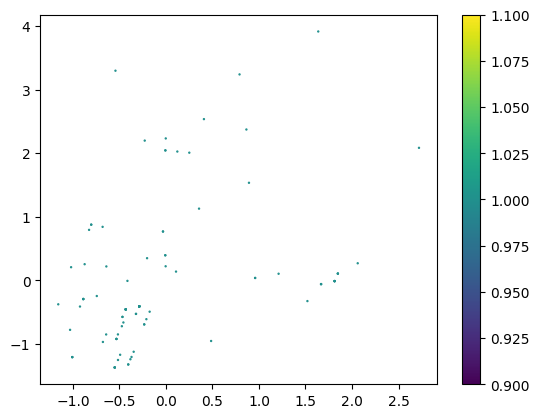

In [14]:
plot_pca(pca.project(2), ["PC1","PC2"], [0 if c == "Cammeo"  else 1 for c in data["class"]])

In [15]:
pca.per_var_of(3)

0.6489879433416356

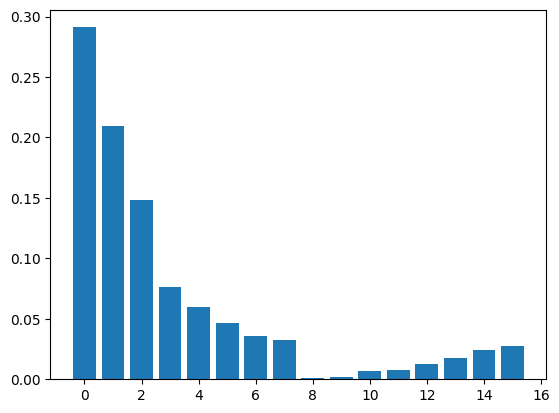

In [16]:
vars = pca.eig_var()
plt.bar(range(len(vars)), vars)
plt.show()

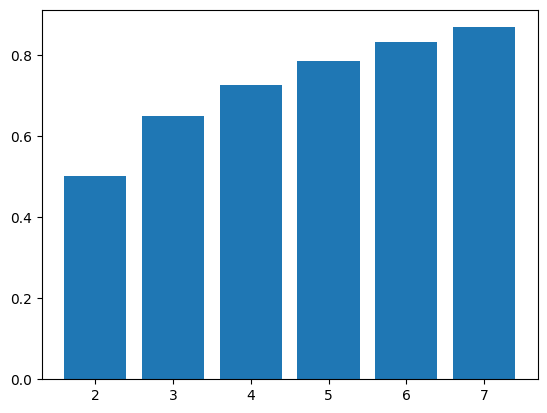

In [17]:
vars = []
for i in range(2, 7+1):
  vars.append(pca.per_var_of(i))
plt.bar(range(2, 7+1), vars)
plt.show()

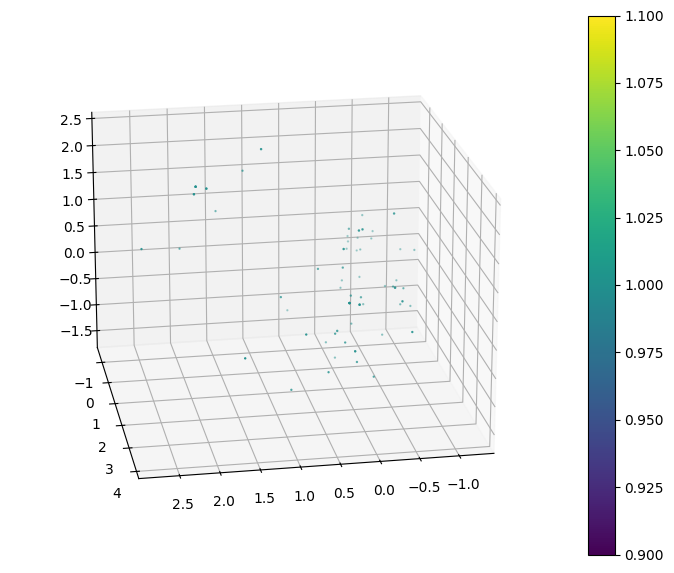

In [18]:
plot_pca(pca.project(3), ["PC1", "PC2", "PC3"], [0 if c == "Cammeo"  else 1 for c in data["class"]], viewbox=[20, 80, 0])